<a href="https://colab.research.google.com/github/MusaibSyd/Machine-learning/blob/main/Breast_Cancer_Prediction_using_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.shape

(569, 33)

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df = df.drop('Unnamed: 32', axis=1)

In [8]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


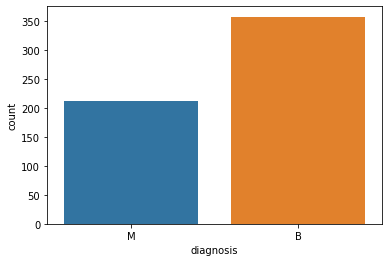

In [10]:
sns.countplot(x='diagnosis', data=df)

In [11]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Converting categorical values to numeric using LabelEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder


In [13]:
label_encoder = LabelEncoder()
df.diagnosis = label_encoder.fit_transform(df.diagnosis)


In [14]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Check the correlation

In [15]:
col = df[["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "symmetry_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean"]]

In [16]:
col.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,symmetry_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.330499,0.358560,0.596534,0.696360,0.776614
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.147741,0.170581,0.506124,0.676764,0.822529
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.071401,-0.023389,0.236702,0.302418,0.293464
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.183027,0.207278,0.556936,0.716136,0.850977
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.151293,0.177028,0.498502,0.685983,0.823269
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,1.000000,0.557775,0.602641,0.500667,0.462497
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,0.557775,1.000000,0.659123,0.521984,0.553695
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.602641,0.659123,1.000000,0.883121,0.831135
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.500667,0.521984,0.883121,1.000000,0.921391
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.462497,0.553695,0.831135,0.921391,1.000000


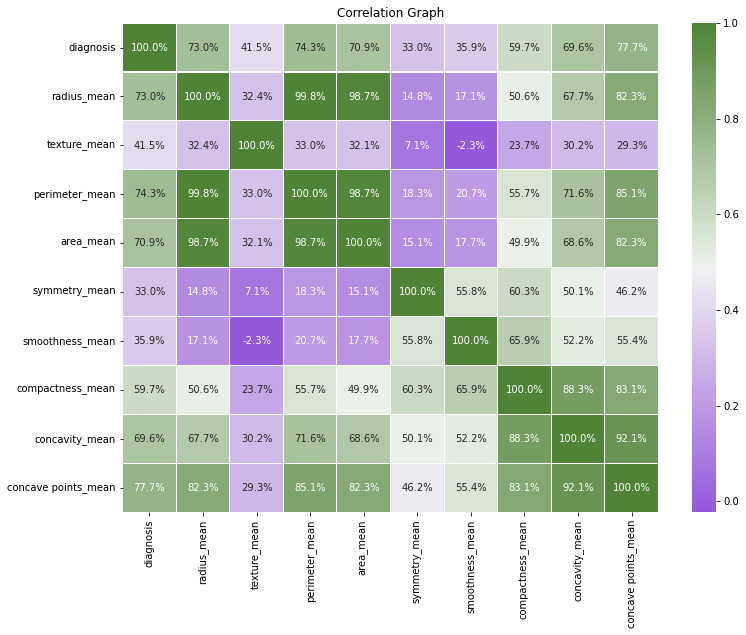

In [17]:
plt.figure(figsize=(12,9))
plt.title("Correlation Graph")
cmap = sns.diverging_palette(1000, 120, as_cmap=True)
sns.heatmap(col.corr(), fmt = '.1%', linewidths=.05, annot=True, cmap=cmap)

In [18]:
X = df[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "symmetry_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean"]]

In [19]:
y = df["diagnosis"]

Model Implementation

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#To check model accuracy

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn import metrics

Spliting the data in to trianing set and testing set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Scaling the datat to keep all the valuyes in the same range of 0 - 1

In [22]:
scaler = StandardScaler()

Not fitting the test to avoid the data leakage

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creating a function to loop models, perform prediction and measure accuracy.

In [24]:
def model_building(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  score = model.score(X_train, y_train)
  predictions = model.predict(X_test)
  accuracy = accuracy_score(predictions, y_test)

  return(score, accuracy, predictions)

In [36]:
models_list = {"LogisticRegression" : LogisticRegression(),
              "RandomForestClassifier": RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
              "DecisionTreeClassifier": DecisionTreeClassifier(criterion='entropy', random_state=0),
              "SVC": SVC(),}

In [37]:
print(list(models_list.keys()))
print(list(models_list.values()))

['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC']
[LogisticRegression(), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), SVC()]


In [42]:

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(y_test, predictions))

   



Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       121
           1       0.92      0.91      0.92        67

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       121
           1       0.88      0.90      0.89        67

    accuracy                           0.92       188
   macro avg       0.91      0.91      0.91       188
weighted avg       0.92      0.92      0.92       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       121
           1       0.95      0.91      0.93        67

    accuracy            

In [46]:
df_prediction = []

for name, model in zip(list(models_list.keys()), list(models_list.values())):
   df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)
df_pred

,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.96063,0.962766,96.28%
1,RandomForestClassifier,0.96063,0.962766,96.28%
2,DecisionTreeClassifier,0.96063,0.962766,96.28%
3,SVC,0.96063,0.962766,96.28%


Using GridSearchCV to know the best performing parameters

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:

model = DecisionTreeClassifier()

# Tunning Parameter

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [2,3,4,5,6,7,8,9,10]}

gsc= GridSearchCV(model,param_grid,cv=10) 
gsc.fit(X_train,y_train)

print("\n Best Score is")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is
DecisionTreeClassifier(max_features='auto', min_samples_leaf=7)

 Best Parametes are
{'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 2}


Checking best parameter and score for KNeighbors Classifier

In [56]:
model = KNeighborsClassifier()


# Tunning Params
param_grid = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}


# Implement GridSearchCV
gsc = GridSearchCV(model, param_grid, cv=10)

# Model Fitting
gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9448717948717947

 Best Estinator is 
KNeighborsClassifier(leaf_size=1, n_neighbors=14)

 Best Parametes are
{'leaf_size': 1, 'n_neighbors': 14, 'weights': 'uniform'}
